Delieverable2  

Yunzhe Yu

Focus: food help (S2201)-> how many people are on food stamps per area, of those what is the demographic breakdown (i.e. for each block area, how many people on food stamps are males/females etc.) How have these changed over the past 5-20 years (however much data you can find)?

1. Import Library Needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import requests
import folium
from folium.plugins import HeatMap
import re


2. Load the data from the Excel file

In [3]:
data = pd.read_csv('ACSST5Y2021.S2201-Data.csv')
API_SECRET_KEY = '12bdbba3fa5fea2052b457fcc1fbc33dcd03607b'

3. How many people on food stamps are males/females in the year 2021?

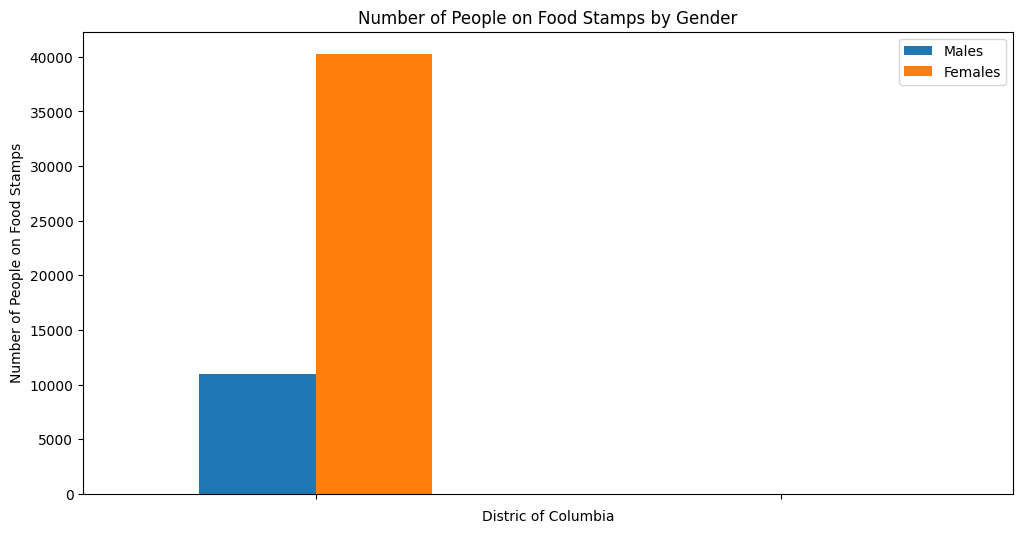

In [4]:
# Replace the column names below with the appropriate column names for area, food stamps for males, and food stamps for females
area_col = "NAME"
male_food_stamps_col = "S2201_C01_006E"
female_food_stamps_col = "S2201_C01_007E"

# Convert columns to numeric format
data[male_food_stamps_col] = pd.to_numeric(data[male_food_stamps_col], errors='coerce')
data[female_food_stamps_col] = pd.to_numeric(data[female_food_stamps_col], errors='coerce')

# Aggregate the data based on area
food_stamps_by_area_gender = data.groupby(area_col)[[male_food_stamps_col, female_food_stamps_col]].sum()

# Rename columns to provide meaningful names
food_stamps_by_area_gender.rename(columns={male_food_stamps_col: 'Males', female_food_stamps_col: 'Females'}, inplace=True)

# Create a stacked bar chart to visualize the demographic breakdown
fig, ax = plt.subplots(figsize=(12, 6))
food_stamps_by_area_gender.plot(kind="bar", ax=ax)
plt.xlabel("Distric of Columbia")
plt.ylabel("Number of People on Food Stamps")
plt.title("Number of People on Food Stamps by Gender")
# Remove x-axis labels (geographic names)
ax.set_xticklabels([])


plt.show()


4. analyze the change in food stamp usage in the DC area over the past 5-20 years

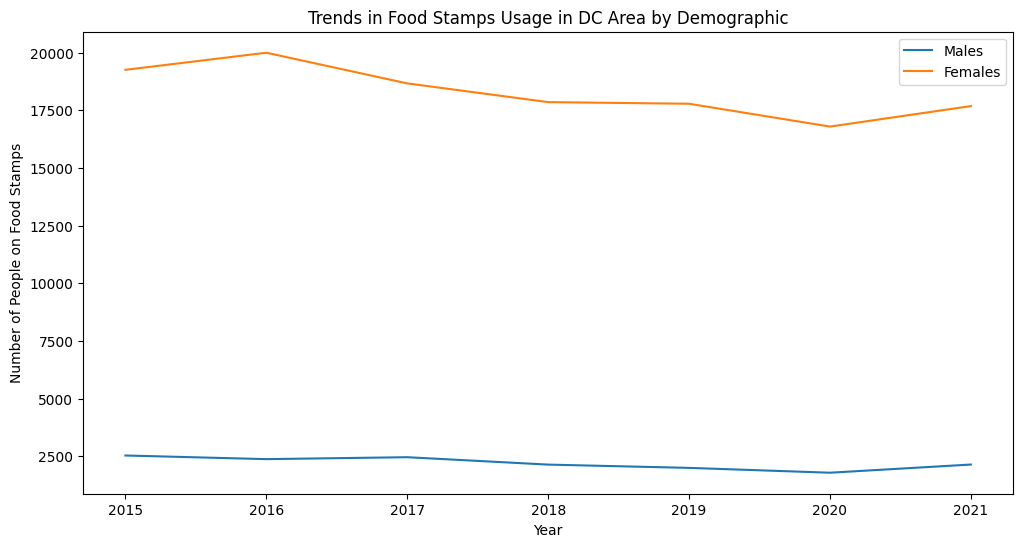

In [25]:

# Function to get ACS data from Census API
def get_acs_data(year, state_code):
    api_key = '12bdbba3fa5fea2052b457fcc1fbc33dcd03607b'
    base_url = f'https://api.census.gov/data/{year}/acs/acs5/subject'
    columns = 'NAME,S2201_C03_006E,S2201_C03_007E'  # Replace these with the relevant columns for the years you are analyzing

    params = {
        'get': columns,
        'for': f'state:{state_code}',
        'key': api_key
    }

    response = requests.get(base_url, params=params)
    
    if response.status_code != 200:
        raise ValueError(f"Error getting data for year {year}: {response.text}")
        
    data = response.json()

    # Convert the response data to a DataFrame and process it
    df = pd.DataFrame(data[1:], columns=data[0])
    df['year'] = year

    return df

# List of years to analyze
years = list(range(2015, 2022))

# Get ACS data for each year, focusing on the DC area (state code 11)
all_years_data = [get_acs_data(year, '11') for year in years]

# Merge data for all years
merged_data = pd.concat(all_years_data)

# Convert columns to numeric format
merged_data['S2201_C03_006E'] = pd.to_numeric(merged_data['S2201_C03_006E'], errors='coerce')
merged_data['S2201_C03_007E'] = pd.to_numeric(merged_data['S2201_C03_007E'], errors='coerce')

# Plot the trends over time
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(x='year', y='S2201_C03_006E', label='Males', ax=ax)
merged_data.plot(x='year', y='S2201_C03_007E', label='Females', ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of People on Food Stamps')
plt.title('Trends in Food Stamps Usage in DC Area by Demographic')
plt.legend()
plt.show()


5. The race that be on food stamp

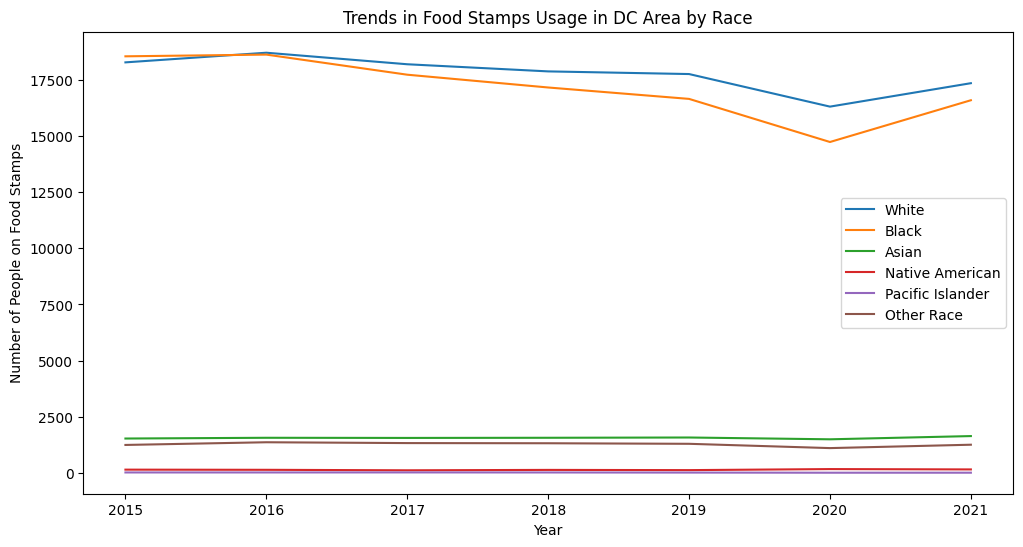

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to get ACS data from Census API
def get_acs_data(year, state_code):
    api_key = '12bdbba3fa5fea2052b457fcc1fbc33dcd03607b'
    base_url = f'https://api.census.gov/data/{year}/acs/acs5/subject'
    columns = 'NAME,S2201_C01_001E,S2201_C03_001E,S2201_C01_025E,S2201_C01_026E,S2201_C01_028E,S2201_C01_027E,S2201_C01_029E,S2201_C01_030E'

    params = {
        'get': columns,
        'for': f'state:{state_code}',
        'key': api_key
    }

    response = requests.get(base_url, params=params)
    
    if response.status_code != 200:
        raise ValueError(f"Error getting data for year {year}: {response.text}")
        
    data = response.json()

    # Convert the response data to a DataFrame and process it
    df = pd.DataFrame(data[1:], columns=data[0])
    df['year'] = year

    return df

# List of years to analyze
years = list(range(2015, 2022))

# Get ACS data for each year, focusing on the DC area (state code 11)
all_years_data = [get_acs_data(year, '11') for year in years]

# Merge data for all years
merged_data = pd.concat(all_years_data)

# Convert columns to numeric format
merged_data['S2201_C01_001E'] = pd.to_numeric(merged_data['S2201_C01_001E'], errors='coerce')
merged_data['S2201_C03_001E'] = pd.to_numeric(merged_data['S2201_C03_001E'], errors='coerce')
merged_data['S2201_C01_025E'] = pd.to_numeric(merged_data['S2201_C01_025E'], errors='coerce')
merged_data['S2201_C01_026E'] = pd.to_numeric(merged_data['S2201_C01_026E'], errors='coerce')
merged_data['S2201_C01_028E'] = pd.to_numeric(merged_data['S2201_C01_028E'], errors='coerce')
merged_data['S2201_C01_027E'] = pd.to_numeric(merged_data['S2201_C01_027E'], errors='coerce')
merged_data['S2201_C01_029E'] = pd.to_numeric(merged_data['S2201_C01_029E'], errors='coerce')
merged_data['S2201_C01_030E'] = pd.to_numeric(merged_data['S2201_C01_030E'], errors='coerce')

# Calculate food stamps per household for each racial group
merged_data["white_food_stamps"] = merged_data['S2201_C03_001E'] * merged_data['S2201_C01_025E'] / merged_data['S2201_C01_001E']
merged_data["black_food_stamps"] = merged_data['S2201_C03_001E'] * merged_data['S2201_C01_026E'] / merged_data['S2201_C01_001E']
merged_data["asian_food_stamps"] = merged_data['S2201_C03_001E'] * merged_data['S2201_C01_028E'] / merged_data['S2201_C01_001E']
merged_data["native_american_food_stamps"] = merged_data['S2201_C03_001E'] * merged_data['S2201_C01_027E'] / merged_data['S2201_C01_001E']
merged_data["pacific_islander_food_stamps"] = merged_data['S2201_C03_001E'] * merged_data['S2201_C01_029E'] / merged_data['S2201_C01_001E']
merged_data["other_race_food_stamps"] = merged_data['S2201_C03_001E'] * merged_data['S2201_C01_030E'] / merged_data['S2201_C01_001E']

# Plot the trends over time for each race
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(x='year', y='white_food_stamps', label='White', ax=ax)
merged_data.plot(x='year', y='black_food_stamps', label='Black', ax=ax)
merged_data.plot(x='year', y='asian_food_stamps', label='Asian', ax=ax)
merged_data.plot(x='year', y='native_american_food_stamps', label='Native American', ax=ax)
merged_data.plot(x='year', y='pacific_islander_food_stamps', label='Pacific Islander', ax=ax)
merged_data.plot(x='year', y='other_race_food_stamps', label='Other Race', ax=ax)

plt.xlabel('Year')
plt.ylabel('Number of People on Food Stamps')
plt.title('Trends in Food Stamps Usage in DC Area by Race')
plt.legend()
plt.show()


6. Food Stamps received per year

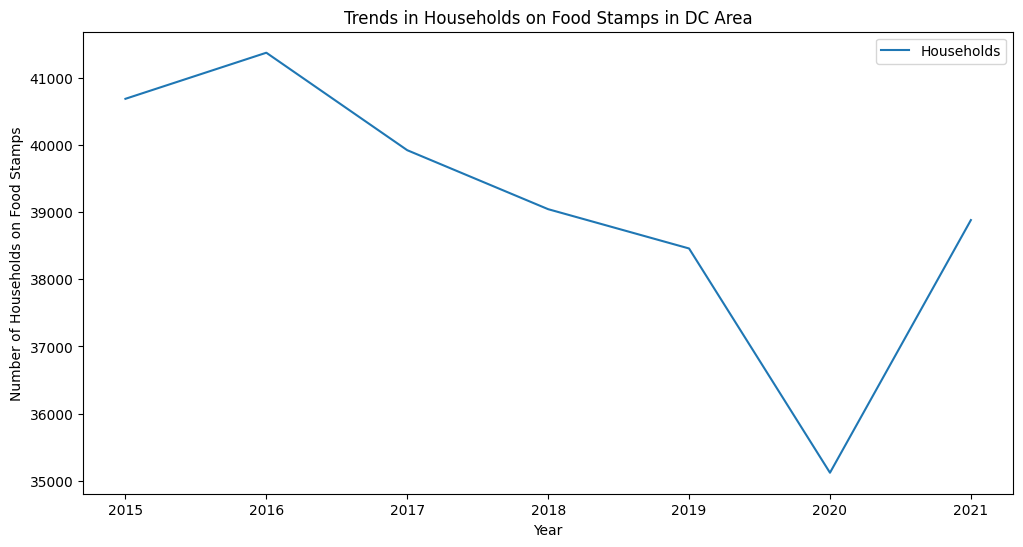

In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_acs_data(year, state_code):
    api_key = '12bdbba3fa5fea2052b457fcc1fbc33dcd03607b'
    base_url = f'https://api.census.gov/data/{year}/acs/acs5/subject'
    columns = 'NAME,S2201_C03_001E'  # Change to the relevant column for households receiving food stamps

    params = {
        'get': columns,
        'for': f'state:{state_code}',
        'key': api_key
    }

    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        raise ValueError(f"Error getting data for year {year}: {response.text}")
        
    data = response.json()

    # Convert the response data to a DataFrame and process it
    df = pd.DataFrame(data[1:], columns=data[0])
    df['year'] = year

    return df


# List of years to analyze
years = list(range(2015, 2022))

# Get ACS data for each year, focusing on the DC area (state code 11)
all_years_data = [get_acs_data(year, '11') for year in years]

# Merge data for all years
merged_data = pd.concat(all_years_data)

# Convert column to numeric format
merged_data['S2201_C03_001E'] = pd.to_numeric(merged_data['S2201_C03_001E'], errors='coerce')

# Plot the trends over time
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(x='year', y='S2201_C03_001E', label='Households', ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Households on Food Stamps')
plt.title('Trends in Households on Food Stamps in DC Area')
plt.legend()
plt.show()


7. By family with children under 18

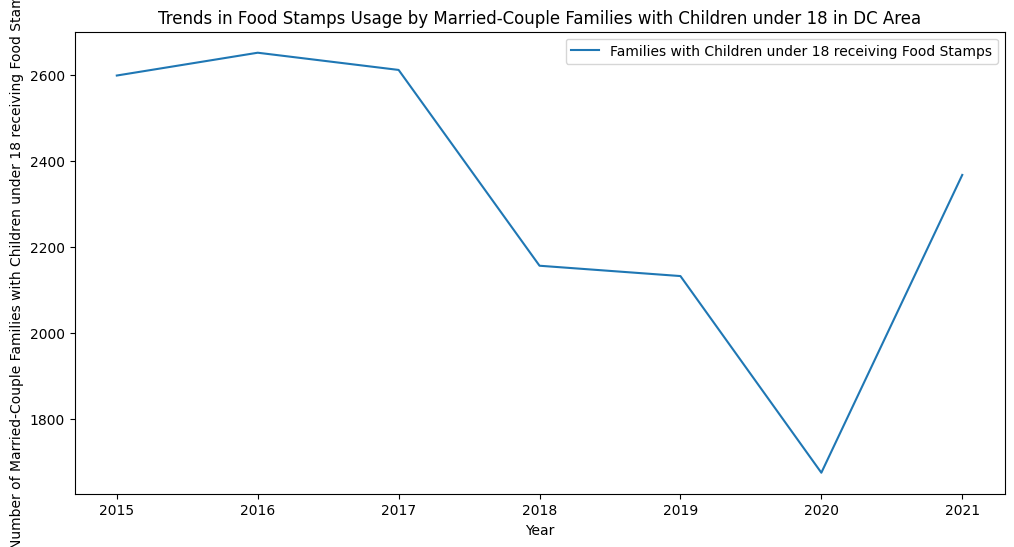

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to get ACS data from Census API
def get_acs_data(year, state_code):
    api_key = '12bdbba3fa5fea2052b457fcc1fbc33dcd03607b'
    base_url = f'https://api.census.gov/data/{year}/acs/acs5/subject'
    columns = 'NAME,S2201_C03_010E'

    params = {
        'get': columns,
        'for': f'state:{state_code}',
        'key': api_key
    }

    response = requests.get(base_url, params=params)
    
    if response.status_code != 200:
        raise ValueError(f"Error getting data for year {year}: {response.text}")
        
    data = response.json()

    # Convert the response data to a DataFrame and process it
    df = pd.DataFrame(data[1:], columns=data[0])
    df['year'] = year

    return df

# List of years to analyze
years = list(range(2015, 2022))

# Get ACS data for each year, focusing on the DC area (state code 11)
all_years_data = [get_acs_data(year, '11') for year in years]

# Merge data for all years
merged_data = pd.concat(all_years_data)

# Convert column to numeric format
merged_data['S2201_C03_010E'] = pd.to_numeric(merged_data['S2201_C03_010E'], errors='coerce')

# Plot the trends over time
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(x='year', y='S2201_C03_010E', label='Families with Children under 18 receiving Food Stamps',ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Married-Couple Families with Children under 18 receiving Food Stamps')
plt.title('Trends in Food Stamps Usage by Married-Couple Families with Children under 18 in DC Area')
plt.show()


8.  Heatmaps

In [98]:

# Load the original data
original_data = pd.read_csv('ACSST5Y2021.S2201-Data.csv')
food_stamps = original_data[['NAME', 'S2201_C01_006E', 'S2201_C01_007E']]

# Extract 'WARD' and 'CENSUS_TRACT' information from the 'NAME' column
def extract_ward_and_tract(name):
    match = re.search(r'(Census Tract \d+), (Ward \d+)', name)
    if match:
        return match.groups()
    else:
        return None, None

food_stamps["WARD"], food_stamps["CENSUS_TRACT"] = zip(*food_stamps["NAME"].apply(extract_ward_and_tract))

# Load the geographical data
geographical_data = pd.read_csv("Address_Points.csv")

# Convert WARD and CENSUS_TRACT columns in both DataFrames to strings
food_stamps["WARD"] = food_stamps["WARD"].astype(str)
food_stamps["CENSUS_TRACT"] = food_stamps["CENSUS_TRACT"].astype(str)
geographical_data["WARD"] = geographical_data["WARD"].astype(str)
geographical_data["CENSUS_TRACT"] = geographical_data["CENSUS_TRACT"].astype(str)

# Merge the food stamp data with the geographic data
merged_data = food_stamps.merge(geographical_data, on=["WARD", "CENSUS_TRACT"])


# Extract the relevant columns (latitude, longitude, and food stamp count)
latitude_col = "LATITUDE"
longitude_col = "LONGITUDE"
male_col = "S2201_C01_006E"
female_col = "S2201_C01_007E"
merged_data["food_stamps_total"] = merged_data[male_col] + merged_data[female_col]

heatmap_data = merged_data[[latitude_col, longitude_col, "food_stamps_total"]].values.tolist()

# Calculate the total number of people on food stamps
merged_data['food_stamps_total'] = merged_data['S2201_C01_006E'] + merged_data['S2201_C01_007E']
food_stamps_col = 'food_stamps_total'

# Update heatmap_data to include the new 'food_stamps_total' column
heatmap_data = merged_data[[latitude_col, longitude_col, food_stamps_col]].values.tolist()

# Create a base map
dc_coordinates = [38.8951100, -77.0363700]  # Coordinates for Washington, D.C.
heatmap_map = folium.Map(location=dc_coordinates, zoom_start=12)

# Calculate the maximum value in the food_stamps_col
max_val = merged_data[food_stamps_col].max()

# Add the heatmap layer with adjusted settings
HeatMap(heatmap_data, radius=25, max_val=max_val, blur=15).add_to(heatmap_map)

# Display the map
heatmap_map




/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000gn/T/ipykernel_65969/97355994.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_stamps["WARD"], food_stamps["CENSUS_TRACT"] = zip(*food_stamps["NAME"].apply(extract_ward_and_tract))
/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000gn/T/ipykernel_65969/97355994.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_stamps["WARD"], food_stamps["CENSUS_TRACT"] = zip(*food_stamps["NAME"].apply(extract_ward_and_tract))
/var/folders/_0/62j9c1s53kb6h59h2bd0mtx40000